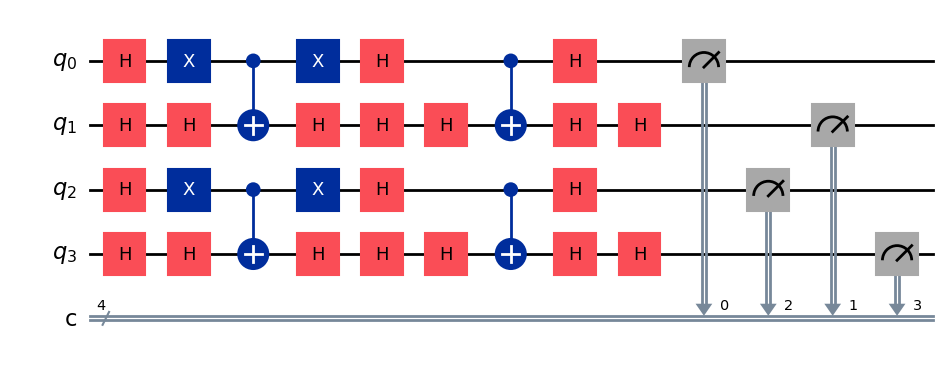

In [2]:
from qiskit.circuit import QuantumCircuit
from qiskit import transpile
from qiskit.providers.fake_provider import GenericBackendV2, Fake5QV1
backend = GenericBackendV2(4)

new_hs4=QuantumCircuit.from_qasm_file('hs4_n4.qasm')
new_hs4.draw("mpl")

In [3]:
new_hs4.depth()

10

In [4]:
new_hs4.count_ops()

OrderedDict([('h', 20), ('x', 4), ('cx', 4), ('measure', 4)])

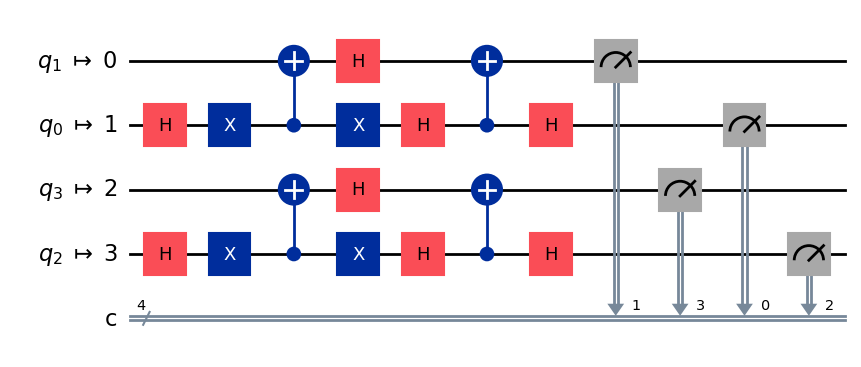

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_circuit_layout
from qiskit.providers.fake_provider import GenericBackendV2, Fake5QV1
backend1 = GenericBackendV2(num_qubits=4,coupling_map=[[0, 1], [0, 2], [1, 0], [1, 3], [2, 0], [2, 3], [3, 1], [3, 2]])

trans_hs4 = transpile(new_hs4, backend=backend1, optimization_level=3, basis_gates=['h','x','cx'])
#trans_qiskit=trans_qiskit1.decompose()
trans_hs4.draw("mpl")

In [6]:
trans_hs4.depth()

8

In [7]:
trans_hs4.count_ops()


OrderedDict([('h', 8), ('x', 4), ('cx', 4), ('measure', 4)])

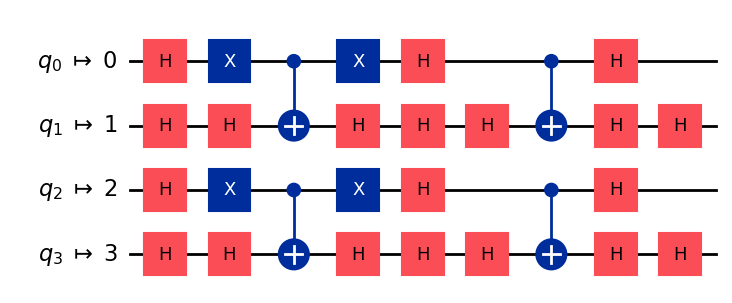

In [12]:
from mqt import qmap

arch = qmap.Architecture(
    4,
    {
        (0, 1),
        (0, 2),
        (1, 0),
        (1, 3),
        (2, 0),
        (2, 3),
        (3, 1),
        (3, 2),
    },
)

a_algo1, res = qmap.compile(new_hs4, arch, method="heuristic", heuristic="gate_count_sum_distance_minus_shared_swaps", add_measurements_to_mapped_circuit=False)
#a_algo1 = transpile(a_algo, backend1, basis_gates=['rz', 'sx', 'cx'])

#a_algo.decompose().draw(output='mpl')
#a_algo=a_algo1.decompose()
a_algo1.draw(output="mpl")

In [13]:
a_algo1.count_ops()

OrderedDict([('h', 20), ('x', 4), ('cx', 4)])

In [14]:
a_algo1.depth()

9

In [11]:
print (" Additional SWAPs : %d" % res . output . swaps )
print (" Runtime : %f" % res . time )

 Additional SWAPs : 0
 Runtime : 0.000159
